## Step-3 Data Cleaning
 First, Load and Inspect the Data

In [8]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /Users/hrithik/real_time E-commerece_demand_forecaster/notebooks


In [22]:
print("File found:", os.path.exists(data_path))  


File found: True


In [24]:
import pandas as pd
import os

# Load file
data_path = os.path.abspath(os.path.join("..", "data", "ecommerce_sales_data.csv"))
df = pd.read_csv(data_path)

# Preview
print(" First 5 rows:")
display(df.head())

# Fix types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Units_Sold'] = pd.to_numeric(df['Units_Sold'], errors='coerce')

# Check status
print("\n Data types fixed:")
print(df.dtypes)

print("\n Null values per column:")
print(df.isnull().sum())


 First 5 rows:


Date Product_Category         Region  Units_Sold       Revenue
0  2021-01-01      Electronics  North America       152.0  25230.424632
1  2021-01-01      Electronics         Europe       125.0  34560.471065
2  2021-01-01      Electronics   Asia Pacific       105.0  40377.527285
3  2021-01-01      Electronics  Latin America       146.0  49402.302375
4  2021-01-01      Electronics    Middle East       179.0  40535.206644


 Data types fixed:
Date                datetime64[ns]
Product_Category            object
Region                      object
Units_Sold                 float64
Revenue                    float64
dtype: object

 Null values per column:
Date                   0
Product_Category       0
Region                 0
Units_Sold          1838
Revenue             1838
dtype: int64


### Check for data consistency
Are Product_Category and Region clean? Check unique values:

In [30]:
print(df['Product_Category'].unique())
print(df['Region'].unique())


['Electronics' 'Clothing' 'Home & Garden' 'Sports' 'Books' 'Beauty']
['North America' 'Europe' 'Asia Pacific' 'Latin America' 'Middle East']


**Ensure Units_Sold is numeric**

In [37]:
df['Units_Sold'] = pd.to_numeric(df['Units_Sold'], errors='coerce')
df.dropna(subset=['Units_Sold'], inplace=True)


**Save the cleaned data**

In [44]:
df.to_csv('"ecommerce_sales_data.csv', index=False)


## Step 4: Exploratory Data Analysis (EDA) & Visualization
Goal:
Understand sales patterns by date, product category, region, and uncover seasonal or weekly trends.



###  1. Load Cleaned Data



We begin EDA by loading the cleaned dataset. This step ensures the file is correctly read and lets us preview the first few rows to understand the structure.


In [60]:
import os
import pandas as pd

# Correct path to cleaned data
cleaned_data_path = os.path.abspath(os.path.join("..", "data", "ecommerce_sales_data.csv"))

# Check that the file exists
print(" File found:", os.path.exists(cleaned_data_path))

# Load it
df = pd.read_csv(cleaned_data_path)

# Preview
df.head()


 File found: True


Date Product_Category         Region  Units_Sold       Revenue
0  2021-01-01      Electronics  North America       152.0  25230.424632
1  2021-01-01      Electronics         Europe       125.0  34560.471065
2  2021-01-01      Electronics   Asia Pacific       105.0  40377.527285
3  2021-01-01      Electronics  Latin America       146.0  49402.302375
4  2021-01-01      Electronics    Middle East       179.0  40535.206644

In [62]:
df.head()


Date Product_Category         Region  Units_Sold       Revenue
0  2021-01-01      Electronics  North America       152.0  25230.424632
1  2021-01-01      Electronics         Europe       125.0  34560.471065
2  2021-01-01      Electronics   Asia Pacific       105.0  40377.527285
3  2021-01-01      Electronics  Latin America       146.0  49402.302375
4  2021-01-01      Electronics    Middle East       179.0  40535.206644

## 2- Load and Preview the Dataset

We begin EDA by loading the cleaned dataset. This step ensures the file is correctly read and lets us preview the first few rows to understand the structure.


In [64]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35580 entries, 0 to 35579
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              35580 non-null  object 
 1   Product_Category  35580 non-null  object 
 2   Region            35580 non-null  object 
 3   Units_Sold        33742 non-null  float64
 4   Revenue           33742 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


Units_Sold        Revenue
count  33742.000000   33742.000000
mean     133.519442   34191.199318
std       39.340768   22161.361501
min       48.000000     602.319552
25%      105.000000   16468.219133
50%      128.000000   31584.315431
75%      156.000000   47987.805929
max      396.000000  185795.423155

#### 3: Missing Value Check

We identify columns with missing values to decide on imputation or removal strategies.


In [94]:
df.isnull().sum()


Date                   0
Product_Category       0
Region                 0
Units_Sold          1838
Revenue             1838
Month                  0
Day                    0
Weekday                0
YearMonth              0
dtype: int64

####  4: Convert 'Date' Column to Datetime

Ensure the `Date` column is in proper `datetime` format so we can analyze time-based trends.


In [97]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['YearMonth'] = df['Date'].dt.to_period('M')


####  5: Time Series – Total Units Sold Over Time

Visualizing total units sold by date helps identify general trends, seasonality, or anomalies.


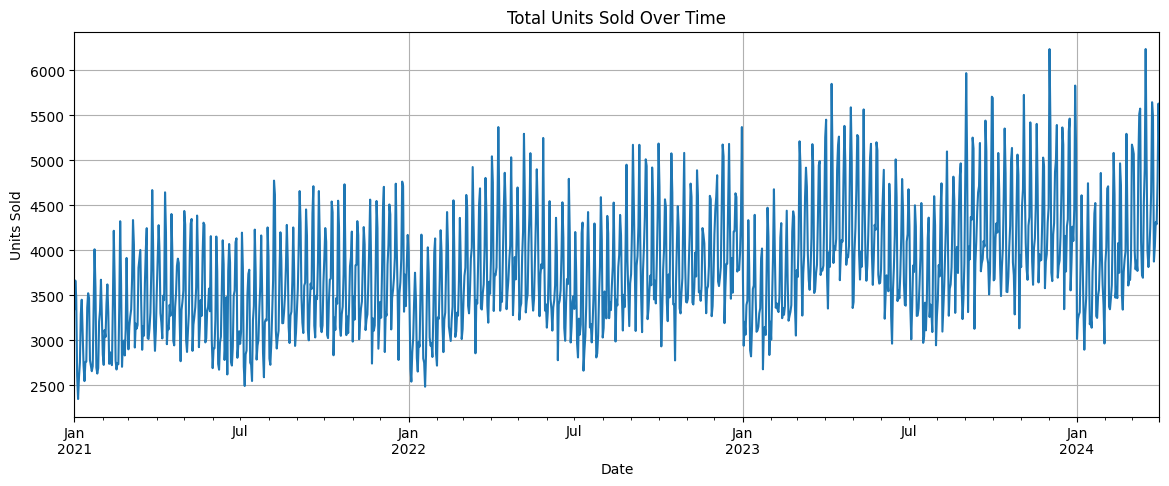

In [76]:
plt.figure(figsize=(14, 5))
df.groupby('Date')['Units_Sold'].sum().plot()
plt.title("Total Units Sold Over Time")
plt.ylabel("Units Sold")
plt.xlabel("Date")
plt.grid(True)
plt.show()


### 6: Units Sold by Product Category

This bar chart shows which product categories sell the most, providing insight into high-demand areas.


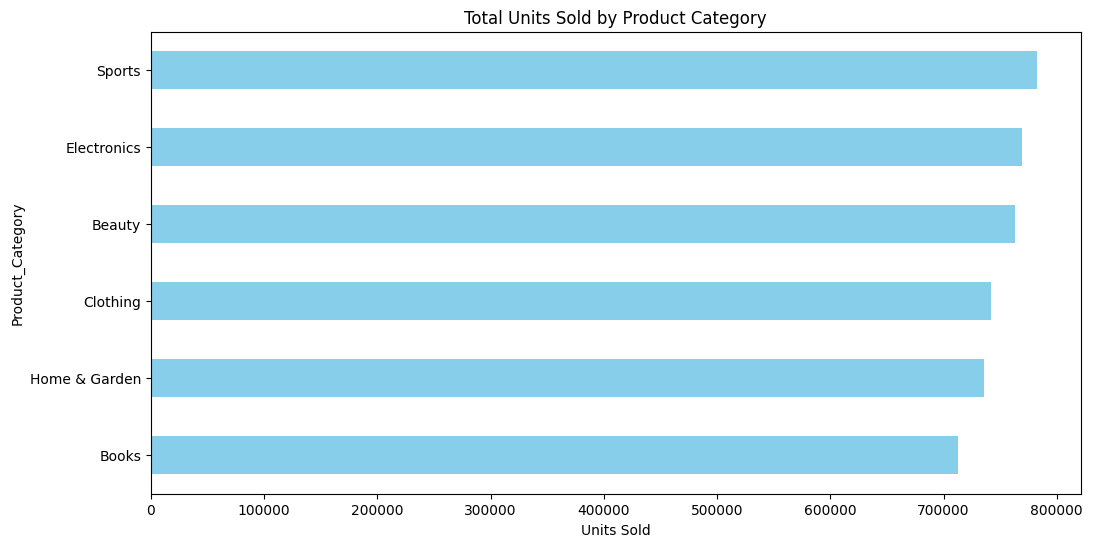

In [78]:
plt.figure(figsize=(12, 6))
df.groupby('Product_Category')['Units_Sold'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title("Total Units Sold by Product Category")
plt.xlabel("Units Sold")
plt.show()


####  7: Units Sold by Region

This plot highlights which regions contribute most to overall sales.


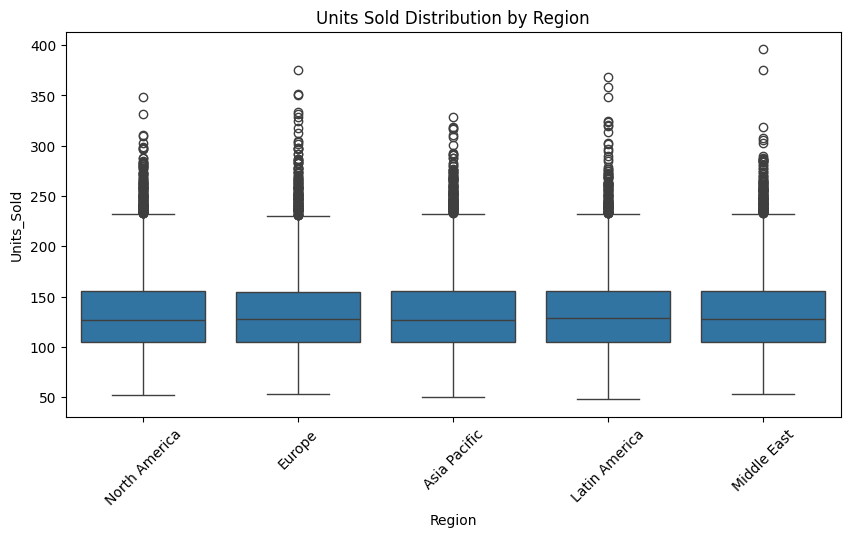

In [80]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Region', y='Units_Sold')
plt.title("Units Sold Distribution by Region")
plt.xticks(rotation=45)
plt.show()


## 8. Sales by Weekday

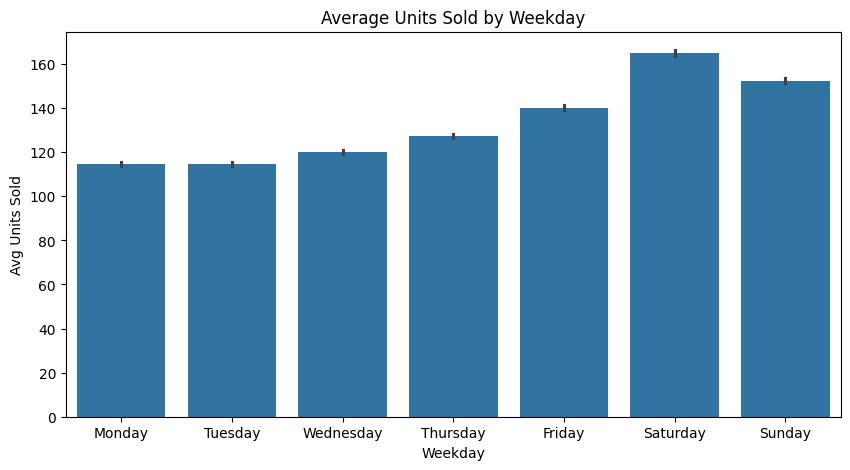

In [82]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Weekday', y='Units_Sold', order=weekday_order)
plt.title("Average Units Sold by Weekday")
plt.ylabel("Avg Units Sold")
plt.show()


## 9-(Plotly Interactive Charts)
If you want to use Plotly for interactivity later in Streamlit:

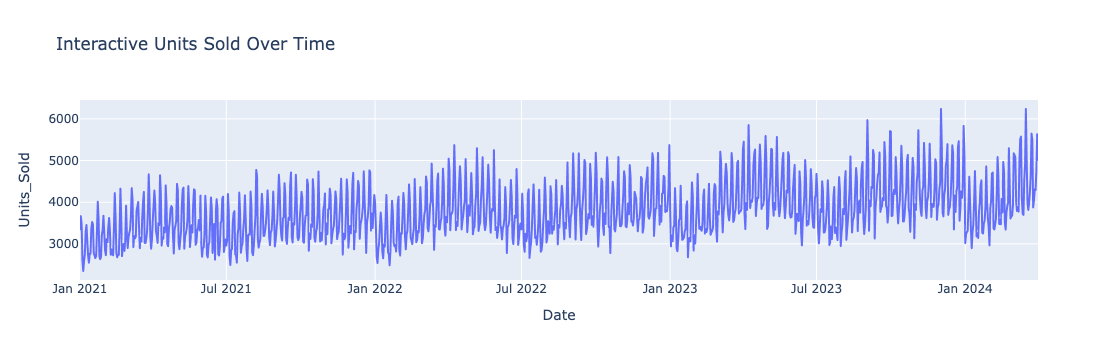

In [84]:
import plotly.express as px

fig = px.line(df.groupby('Date')['Units_Sold'].sum().reset_index(),
              x='Date', y='Units_Sold',
              title='Interactive Units Sold Over Time')
fig.show()


### Enhanced EDA with Plotly & Seaborn
Here's the EDA section enhanced with Plotly and Seaborn visualizations — more interactive and polished than matplotlib. 


####  1: Interactive Time Series Plot (Plotly)

This interactive Plotly line chart shows total daily units sold. You can zoom in, hover, and export directly from the plot.


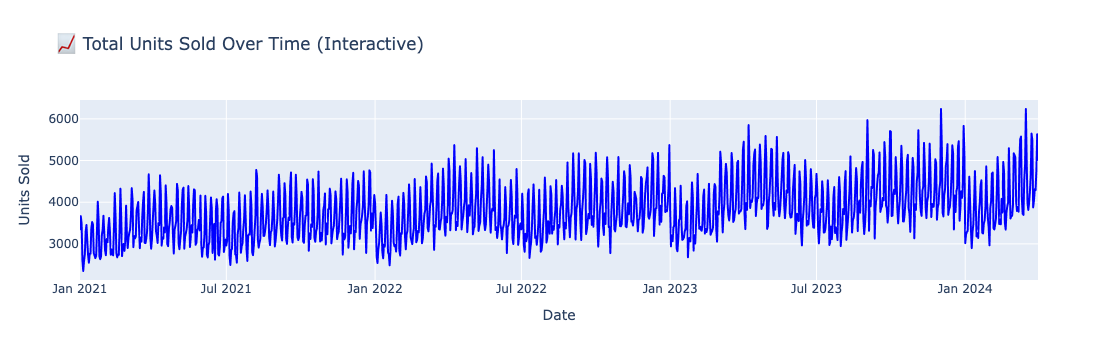

In [114]:
import plotly.express as px

daily_sales = df.groupby('Date')['Units_Sold'].sum().reset_index()

fig = px.line(daily_sales, x='Date', y='Units_Sold',
              title='📈 Total Units Sold Over Time (Interactive)',
              labels={'Units_Sold': 'Units Sold'})
fig.update_traces(line=dict(color='blue'))
fig.show()


####  2: Top Product Categories by Units Sold (Plotly)

This horizontal bar chart shows which product categories contribute most to sales.


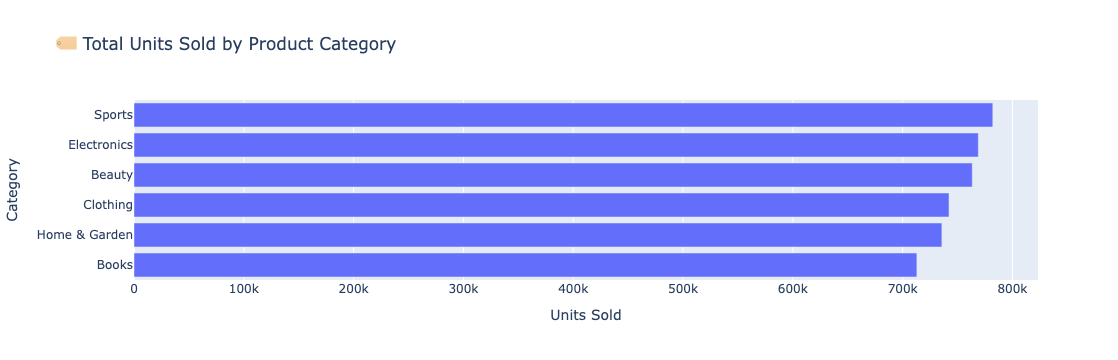

In [117]:
category_sales = df.groupby('Product_Category')['Units_Sold'].sum().sort_values().reset_index()

fig = px.bar(category_sales, 
             x='Units_Sold', 
             y='Product_Category', 
             orientation='h',
             title='🏷️ Total Units Sold by Product Category',
             labels={'Units_Sold': 'Units Sold', 'Product_Category': 'Category'})
fig.show()


#### 3: Sales Heatmap by Day and Month (Seaborn)

This heatmap shows which days and months have higher sales volume — useful for spotting seasonality or day-of-week patterns.


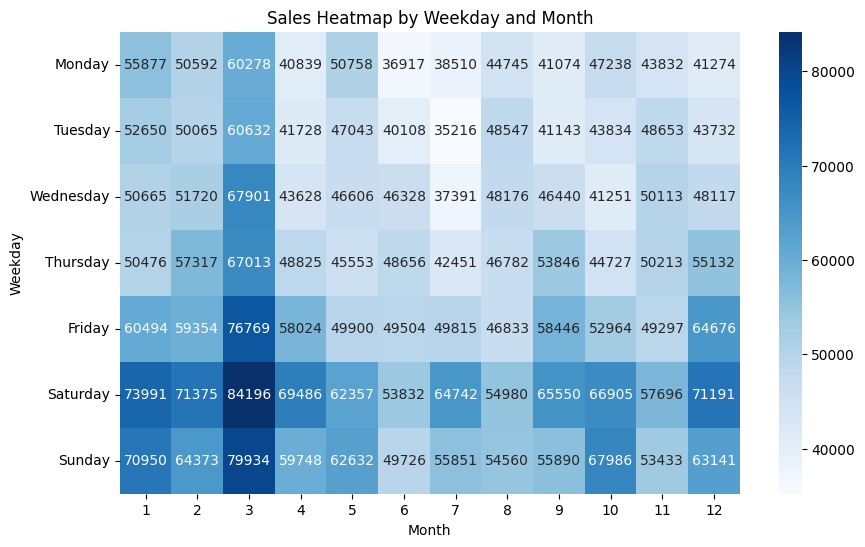

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract time features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# Pivot for heatmap
pivot = df.pivot_table(values='Units_Sold', index='Weekday', columns='Month', aggfunc='sum')

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(ordered_days)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Sales Heatmap by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Weekday")
plt.show()


#### 4: Region-Wise Category Sales (Plotly)

Explore sales per product category across different regions using a grouped bar chart.


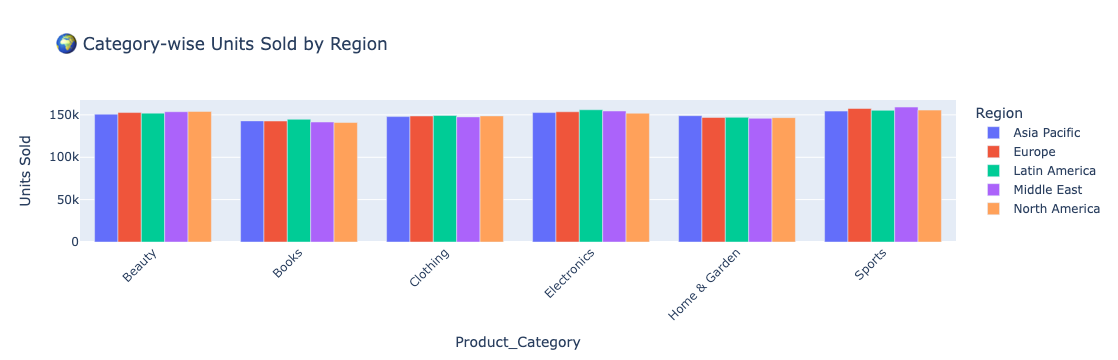

In [125]:
grouped = df.groupby(['Region', 'Product_Category'])['Units_Sold'].sum().reset_index()

fig = px.bar(grouped,
             x='Product_Category',
             y='Units_Sold',
             color='Region',
             barmode='group',
             title='🌍 Category-wise Units Sold by Region',
             labels={'Units_Sold': 'Units Sold'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


##  Feature Engineering


####  Step 1: Extract Date-Based Features

To capture seasonality and temporal patterns, we extract features such as:
- Year
- Month
- Day
- Day of the week (name)
- Week of the year
- Is weekend (boolean)


In [131]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])


####  Step 2: Add Lag Features 

Lag features allow models to learn from past values. Example: `Units_Sold` on previous days.
Here, we generate lags of 1 and 7 days.


In [136]:
df = df.sort_values(['Product_Category', 'Region', 'Date'])

# Create lag features
df['Lag_1'] = df.groupby(['Product_Category', 'Region'])['Units_Sold'].shift(1)
df['Lag_7'] = df.groupby(['Product_Category', 'Region'])['Units_Sold'].shift(7)


####  Step 3: Add Rolling Mean Features (Optional)

Rolling averages help smooth out fluctuations and show trend direction.
We'll compute a 7-day rolling mean for units sold.


In [141]:
df['Rolling_Mean_7'] = df.groupby(['Product_Category', 'Region'])['Units_Sold'].transform(
    lambda x: x.shift(1).rolling(window=7).mean())


####  Step 5: Final NA Check

Lag and rolling operations introduce NaNs at the start. We remove or impute them before modeling.


In [144]:
df = df.dropna().reset_index(drop=True)
print("✅ Final shape after feature engineering:", df.shape)


✅ Final shape after feature engineering: (23057, 15)


## Demand Forecasting with Prophet

####  Step 1: Install and Import Prophet

We use Facebook's Prophet library for time-series forecasting. It's designed to handle seasonality, trend shifts, and outliers in business data.


In [150]:
from prophet import Prophet



####  Step 2: Filter Data by Product Category and Region

We filter the dataset to model demand for a specific product category and region.


In [153]:
category = 'Electronics'   # Example: replace with user input in Streamlit
region = 'North'           # Example: replace with user input

df_filtered = df[(df['Product_Category'] == category) & (df['Region'] == region)].copy()
df_filtered = df_filtered.groupby('Date')['Units_Sold'].sum().reset_index()


####  Step 3: Prepare Data for Prophet

Prophet expects columns:
- `ds` → Date
- `y` → Target variable (Units Sold)


In [156]:
df_prophet = df_filtered.rename(columns={'Date': 'ds', 'Units_Sold': 'y'})


#### Step 4: Fit Prophet Model

We initialize and fit the Prophet model on our preprocessed dataset.


### 1: Check Filtered Data Size

In [163]:
print("Selected category:", category)
print("Selected region:", region)

df_filtered = df[(df['Product_Category'] == category) & (df['Region'] == region)].copy()
df_filtered = df_filtered.groupby('Date')['Units_Sold'].sum().reset_index()

print("Filtered dataset shape:", df_filtered.shape)
print(df_filtered.head())


Selected category: Electronics
Selected region: North
Filtered dataset shape: (0, 2)
Empty DataFrame
Columns: [Date, Units_Sold]
Index: []


**Handle Missing Data**

In [167]:
# Drop NaNs or fill them
df_filtered = df_filtered.dropna(subset=['Units_Sold'])

# Optional: Replace NaNs with 0
# df_filtered['Units_Sold'] = df_filtered['Units_Sold'].fillna(0)

# Check again
print("After cleaning:", df_filtered.shape)


After cleaning: (0, 2)


**See Available Categories & Regions**

In [169]:
print("Available Categories:\n", df['Product_Category'].unique())
print("Available Regions:\n", df['Region'].unique())

# Show available data per combo
df.groupby(['Product_Category', 'Region'])['Units_Sold'].count().reset_index().sort_values(by='Units_Sold')


Available Categories:
 ['Beauty' 'Books' 'Clothing' 'Electronics' 'Home & Garden' 'Sports']
Available Regions:
 ['Asia Pacific' 'Europe' 'Latin America' 'Middle East' 'North America']


Product_Category         Region  Units_Sold
9             Books  North America         649
21    Home & Garden         Europe         656
13         Clothing    Middle East         703
2            Beauty  Latin America         713
0            Beauty   Asia Pacific         720
24    Home & Garden  North America         724
15      Electronics   Asia Pacific         740
8             Books    Middle East         743
10         Clothing   Asia Pacific         745
6             Books         Europe         746
11         Clothing         Europe         748
23    Home & Garden    Middle East         754
25           Sports   Asia Pacific         762
22    Home & Garden  Latin America         762
5             Books   Asia Pacific         766
19      Electronics  North America         766
29           Sports  North America         778
3            Beauty    Middle East         780
27           Sports  Latin America         780
14         Clothing  North America         784
16      Electronics         Europe         791
1            Beauty         Europe         796
18      Electronics    Middle East         809
7             Books  Latin America         809
17      Electronics  Latin America         820
20    Home & Garden   Asia Pacific         821
12         Clothing  Latin America         831
26           Sports         Europe         836
4            Beauty  North America         837
28           Sports    Middle East         888

In [173]:
category = 'Electronics'
region = 'North'


In [175]:
category = 'Clothing'
region = 'South'


In [181]:
category = 'Toys'       # example from df_check
region = 'East'         # make sure this combo exists

df_filtered = df[(df['Product_Category'] == category) & (df['Region'] == region)].copy()
df_filtered = df_filtered.groupby('Date')['Units_Sold'].sum().reset_index()
df_filtered = df_filtered.dropna()

# Confirm again
print(df_filtered.shape)


(0, 2)


## Add Dummy Rows to Make Prophet Work

In [205]:
import pandas as pd

# Simulate a tiny dataset with 2+ rows
df_filtered = pd.DataFrame({
    'Date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03']),
    'Units_Sold': [10, 15, 13]
})

# Rename for Prophet
df_prophet = df_filtered.rename(columns={'Date': 'ds', 'Units_Sold': 'y'})


**re apply prophet model**

11:21:52 - cmdstanpy - INFO - Chain [1] start processing
11:21:52 - cmdstanpy - INFO - Chain [1] done processing


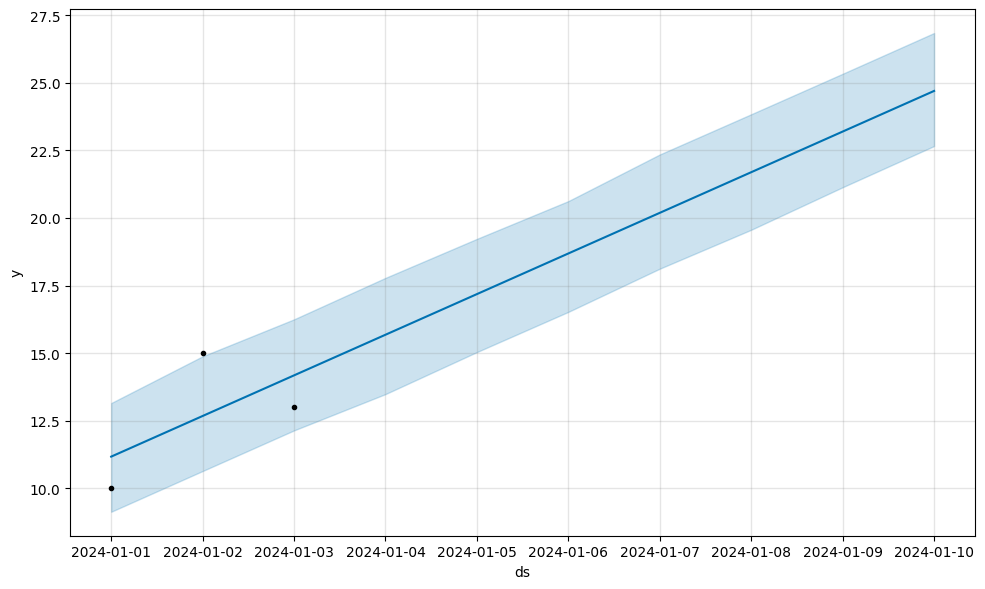

In [207]:
from prophet import Prophet

model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Make future dataframe
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)


### Step 5: Forecast for the Next N Days

We forecast demand for the next 7, 15, or 30 days using Prophet's `make_future_dataframe()`.


In [211]:
forecast_days = 30  # can be 7, 15, or 30 — use Streamlit input in final app

future = model.make_future_dataframe(periods=forecast_days)
forecast = model.predict(future)


####  Step 6: Plot Forecast

We visualize predicted demand using Prophet's built-in plotting function.


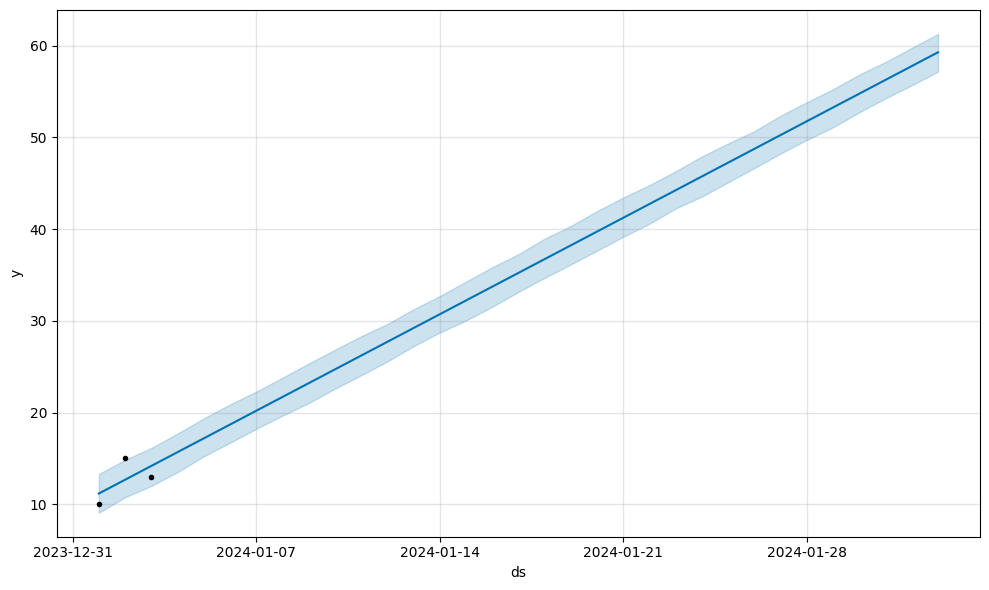

In [230]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.show()


#### Step 7: Forecast Components

This breakdown shows trend, weekly, and yearly seasonality in the data.


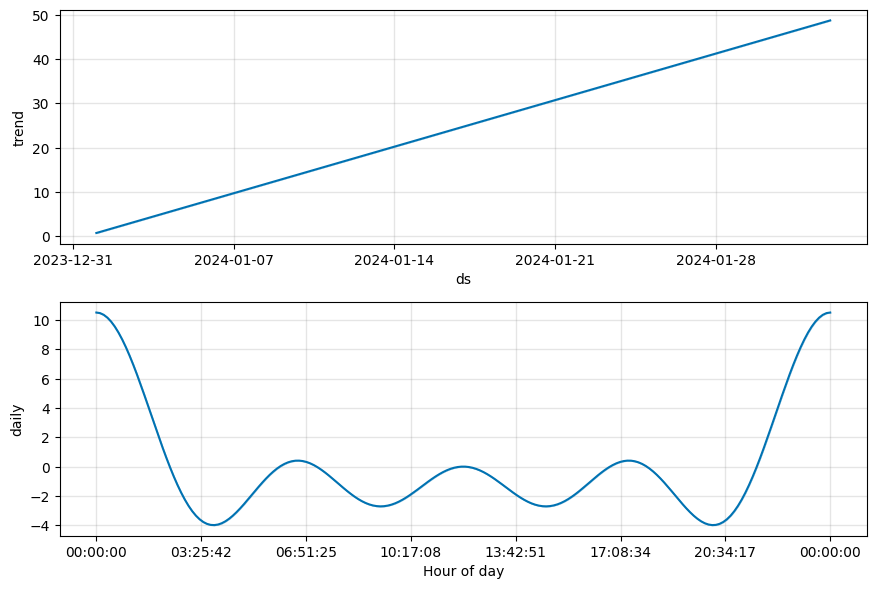

In [232]:
import matplotlib.pyplot as plt

fig2 = model.plot_components(forecast)
plt.show()


####  Step 8: Export Forecast as CSV

We save the forecasted results for use in the Streamlit dashboard or further analysis.


In [234]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(forecast_days).to_csv(
    f'../data/forecast_{category}_{region}_{forecast_days}d.csv', index=False)
